# [George McNinch](http://gmcninch.math.tufts.edu) Math 87 - Spring 2025

# Week 8

# Power-iteration & eigenvalues

Eigenvalues & power-iteration
=============================

Let $A \in \mathbb{R}^{n \times n}$ be a square matrix.
Our goal is to understand the *eventual behavior* of powers of $A$; i.e. the matrices $A^m$ for $m \to \infty$.




Example: Diagonal matrices
---------------------------

Let's look at a simple example. Consider the following matrix:

$$A = \begin{bmatrix}
\lambda_1 & 0 & 0 & 0 \\
0 & \lambda_2 & 0 & 0 \\
0 & 0 & \lambda_3 & 0  \\
0 & 0 & 0 & \lambda_4 \\
\end{bmatrix}$$

In this case, it is easy to understand the powers of $A$; indeed, we have

$$A^m = \begin{bmatrix}
\lambda_1^m & 0 & 0 & 0 \\
0 & \lambda_2^m & 0 & 0 \\
0 & 0 & \lambda_3^m & 0  \\
0 & 0 & 0 & \lambda_4^m \\
\end{bmatrix}$$




example, continued
------------------
Observe that if $|\lambda| < 1$, then $\lambda^m \to 0$ as $m \to \infty$. So e.g.
if $|\lambda_i| < 1$ for $i=1,2,3,4$, then 

$$A^m \to \mathbf{0} \quad \text{as} \quad m \to \infty.$$

If $\lambda_1 = 1$ and $|\lambda_i| < 1$ for $i = 2,3,4$, then

$$A^m \to  \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 \\
\end{bmatrix}.$$

On the other hand, if $|\lambda_i| > 1$ for some $i$, 
then $\lim_{m \to \infty} A^m$ doesn't exist, because
$\lambda_i^m \to \pm \infty$ as $m \to \infty$.

Of course, "most" matrices aren't diagonal, or at least not *literally*.

Eigenvalues and eigenvectors
-----------------------------

Recall that a number $\lambda \in\mathbb{R}$ is an *eigenvalue* of the $n \times n$ matrix 
$A$ if there is a non-zero vector $\mathbf{v} \in \mathbb{R}^n$ for which
$$A \mathbf{v} = \lambda \mathbf{v};$$
$\mathbf{v}$ is then called an *eigenvector*.

If $A$ is diagonal -- e.g. if 

$$A = \begin{bmatrix}
\lambda_1 & 0 & 0 & 0 \\
0 & \lambda_2 & 0 & 0 \\
0 & 0 & \lambda_3 & 0  \\
0 & 0 & 0 & \lambda_4 \\
\end{bmatrix} =\operatorname{diag}(\lambda_1,\lambda_2,\lambda_3,\lambda_4)$$

-- it is easy to see that each standard basis vector $\mathbf{e}_i$
is an eigenvector, with corresponding eigenvalue $\lambda_i$ (the $(i,i)$-the entry of $A$).



Eigenvectors
------------

Now suppose that $A$ is an $n\times n$ matrix, that
$\mathbf{v}_1,\dots,\mathbf{v}_n$ are eigenvectors for $A$, and that
$\lambda_1,\dots,\lambda_n$ are the corresponding eigenvalues.
Write
$$P = \begin{bmatrix} \mathbf{v}_1 & \cdots & \mathbf{v}_n \end{bmatrix}$$
for the matrix whose columns are the $\mathbf{v}_i$.

**Theorem 0**: $P$ is invertible if and only if the vectors $\mathbf{v}_1,\dots,\mathbf{v}_n$ are linearly independent.

**Theorem 1**: If the eigenvalues $\lambda_1,\dots,\lambda_n$ are *distinct*, then the vectors $\mathbf{v}_1,\dots,\mathbf{v}_n$ are
linearly independent, and in particular, the matrix $P$ is invertible.




Diagonalizable matrices
-----------------------

**Theorem 2**: If the eigenvectors $\mathbf{v}_1,\dots,\mathbf{v}_n$
are linearly independent -- equivalently, if the matrix $P$ is invertible -- then 
$$P^{-1} A P = \begin{bmatrix}
\lambda_1 & 0 & 0 & 0 \\
0 & \lambda_2 & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots  \\
0 & 0 & 0 & \lambda_n \\
\end{bmatrix} = \operatorname{diag}(\lambda_1,\dots,\lambda_n)$$
i.e. $P^{-1} A P$ is the diagonal matrix $n \times n$ matrix whose diagonal entries
are $\lambda_1,\dots,\lambda_n$.

Because of **Theorem 2**, one says that the $n \times n$ matrix $A$ is *diagonalizable* if it has $n$ linearly independent eigenvectors.

Thus if we are willing to replace our matrix by the *conjugate* matrix $P^{-1} A P$, then for $A$ diagonalizable, for some purposes "we  may as well suppose that $A$ is diagonal" (though of course that statement is imprecise!).



Finding eigenvalues
-------------------

One might wonder "how do I find eigenvalues"? The answer is: the eigenvalues of $A$ are the roots of the *characteristic polynomial* $p_A(t)$ of $A$, where:

$$p_A(t) = \operatorname{det}(A - t \cdot \mathbf{I_n}).$$

**Proposition**: The characteristic polynomial $p_A(t)$ of the $n\times n$ matrix $A$ has degree $n$, and thus $A$ has no more than $n$ distinct eigenvalues.

**Remark:** The eigenvalues of $A$ are complex numbers which in general may fail to be real numbers, even when $A$ has only real-number coefficients.

--------------



Tools for finding eigenvalues
-----------------------------

`python` and `numpy` provides tools for finding eigenvalues. Let's look at the following
example:


**Example:** Consider the matrix
$$A = \left(\dfrac{1}{10}\right)\cdot \begin{bmatrix} 
1 & 1 & 0 & 0 \\
0 & 2 & 2 & 0 \\
0 & 3 & 3 & 1 \\
0 & 0 & 1 & 2 
\end{bmatrix}.$$

In [1]:
import numpy as np
import numpy.linalg as npl


float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})


A = (1/10)*np.array([[1,1,0,0],[0,2,2,0],[0,3,3,1],[0,0,1,2]])

A

array([[0.10, 0.10, 0.00, 0.00],
       [0.00, 0.20, 0.20, 0.00],
       [0.00, 0.30, 0.30, 0.10],
       [0.00, 0.00, 0.10, 0.20]])

Let's find the eigenvectors/values of this $4 \times 4$ matrix $A$; we'll use
the function ``eig`` found in the python module ``numpy.linalg``:

In [3]:
(e_vals,e_vecs) = npl.eig(A)
[e_vals,e_vecs]

[array([0.10, 0.52, -0.02, 0.20]),
 array([[1.00, -0.12, -0.47, -0.30],
        [0.00, -0.51, 0.56, -0.30],
        [0.00, -0.81, -0.62, -0.00],
        [0.00, -0.25, 0.28, 0.90]])]

In [8]:
e_vecs[1,:]


array([0.00, -0.51, 0.56, -0.30])

The function ``eig`` returns a "list of np arrays". This first array contains
the eigenvalues, and the second contains the a matrix whose *columns* are the eigenvectors.

We've assigned the first component of the list to the variable ``e_vals``
and the second to ``e_vecs``.

To get the individual eigenvectors, we need to [slice](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing) the array ``e_vecs``.

For example, to get the 0-th ("first"!) eigenvector, we can use

``e_vecs[:,0]``

Here, the argument ``:`` indicates that the full range should be used in the first index dimension, and the argument ``0`` indicates the the second index dimension of the slice is ``0``. Thus ``numpy`` returns the array whose entries are ``e_vecs[0,0], e_vecs[1,0], e_vecs[2,0], e_vecs[3,0]``.

Let's confirm that this is really an eigenvector with the indicated eigenvalue:

In [10]:
v = e_vecs[:,3]
[v,A @ v,e_vals[3]*v, (A @ v - e_vals[3] * v < 1e-7).all()]

[array([-0.30, -0.30, -0.00, 0.90]),
 array([-0.06, -0.06, -0.00, 0.18]),
 array([-0.06, -0.06, -0.00, 0.18]),
[array([1.00, 0.00, 0.00, 0.00]),
 array([0.10, 0.00, 0.00, 0.00]),
 array([0.10, 0.00, 0.00, 0.00]),
 np.True_]

Let's check *all* of the eigenvalues:

In [4]:
import pprint

def check(A):
    e_vals,e_vecs = npl.eig(A)
    
    def check_i(i):
        lam = float(e_vals[i])
        v= e_vecs[:,i]
        return { "lambda": lam,
                 "A.v": A @ v,
                 "lambda.v": lam*v,
                 "match?": np.abs(A @ v - lam*v < 1e-6).all()
               }
    return [ check_i(i) for i in range(len(e_vals)) ]
        


In [5]:
pprint.pp(check(A))

[{'lambda': 0.1,
  'A.v': array([0.10, 0.00, 0.00, 0.00]),
  'lambda.v': array([0.10, 0.00, 0.00, 0.00]),
  'match?': np.True_},
 {'lambda': 0.5192582403567257,
  'A.v': array([-0.06, -0.26, -0.42, -0.13]),
  'lambda.v': array([-0.06, -0.26, -0.42, -0.13]),
  'match?': np.True_},
 {'lambda': -0.019258240356725218,
  'A.v': array([0.01, -0.01, 0.01, -0.01]),
  'lambda.v': array([0.01, -0.01, 0.01, -0.01]),
  'match?': np.True_},
 {'lambda': 0.19999999999999998,
  'A.v': array([-0.06, -0.06, -0.00, 0.18]),
  'lambda.v': array([-0.06, -0.06, -0.00, 0.18]),
  'match?': np.True_}]


Let's observe that $A$ has 4 distinct eigenvalues, and is thus diagonalizable.
Moreover, every eigenvalue $\lambda$ of $A$ satisfies $|\lambda| < 1$.
Thus, we conclude that $A^m \to \mathbf{0}$ as $m \to \infty$.

And indeed, we confirm that:

In [6]:
res=[(npl.matrix_power(A,j) - np.zeros((4,4)) < 1e-7*np.ones((4,4))).all() for j in range(50)]

j = res.index(True)   ## find the first instance in the list of results      

print(f"A^{j} == 0")

A^24 == 0


Eigenvalues and power iteration.
--------------------------------

**Theorem 3**: Let $A$ be a diagonalizable $n \times n$, with $n$ linearly independent eigenvectors $\mathbf{v}_1,\dots,\mathbf{v}_n$
with corresponding eigenvalues $\lambda_1,\dots,\lambda_n$.
As before, write

$$P = \begin{bmatrix} 
\mathbf{v}_1 & \cdots & \mathbf{v}_n 
\end{bmatrix}.$$

**a)** Suppose $|\lambda_i| <1$ for all $i$. Then $A^m \to \mathbf{0}$ as $m \to \infty$.

**b)** Suppose that $\lambda_1 = 1$, and $|\lambda_i| <1$ for $2 \le i \le n$. 
Any vector $\mathbf{v} \in \mathbb{R}^n$ may be written

$$\mathbf{v} = \sum_{i=1}^n c_i \mathbf{v}_i.$$

If $c_1 \ne 0$, then 
$$A^m \mathbf{v} = c_1\mathbf{v}_1 
\quad \text{as} \quad m \to \infty.$$

If $c_1 = 0$ then
$$A^m \mathbf{v} =  \mathbf{0}
\quad \text{as} \quad m \to \infty.$$

Proof:
------

For **a)**, note that $P^{-1} A P = \operatorname{diag}(\lambda_1,\dots,\lambda_n)$.
Which shows that

$$(P^{-1} A P)^m = \operatorname{diag}(\lambda_1,\dots,\lambda_n)^m = 
\operatorname{diag}(\lambda_1^m,\dots,\lambda_n^m) \to \mathbf{0} \quad \text{as $m \to \infty$}.$$

Let's now notice that
$$(P^{-1} A P)^2 = (P^{-1} A P)(P^{-1} A P) = P^{-1} A A P = P^{-1} A^2 P$$
and more generally
$$(P^{-1} A P)^m = P^{-1} A^m P \quad \text{for $m \ge 0$}.$$

We now see that 
$$P^{-1} A^m P  \to \mathbf{0} \quad \text{as $m \to \infty$}$$
so that
$$A^m  \to P \cdot \mathbf{0} \cdot P^{-1} = \mathbf{0} \quad \text{as $m \to \infty$}$$


Proof of **b)**:
----------------

Recall that $\mathbf{v} = \sum_{i=1}^n c_i \mathbf{v}_i$.

For $i > 1$, **a)** shows that 
$$A^m \mathbf{v}_i \to \mathbf{0} \quad \text{as $m \to \infty$}.$$

while

$$A^m \mathbf{v}_1 = \mathbf{v}_1 \quad \text{for all $m$}.$$

The preceding discussion now shows that 

$$A^m \mathbf{v} = \sum_{i=1}^n c_i A^m \mathbf{v}_i \mapsto c_1 \mathbf{v_1}$$

and **b)** follows at once.

Corollary
---------

Suppose that $A$ is diagonalizable with eigenvalues $\lambda_1,\dots,\lambda_n$, that
$\lambda_1 = 1$, and that $|\lambda_i| < 1$ for $i =2,...,n$.
Let $\mathbf{v_1}$ be a 1-eigenvector for $A$.

Then 

$$A^m \to B \quad \text{as $m \to \infty$}$$

for a matrix $B$ with the property that each column of $B$ is either $\mathbf{0}$
or some multiple of $\mathbf{v_1}$.

**Indeed:** the $i$th column of $B$ can be found by computing

$$(\heartsuit) \quad \lim_{m \to \infty} A^m \mathbf{e}_i$$

where $\mathbf{e}_i$ is the $i$th standard basis vector.

We've seen above that $(\heartsuit)$ is either $0$ or a multiple of $\mathbf{v}$, depending
on whether or not the coefficient $c_1$ in the expression

$$\mathbf{e}_i = \sum_{j =1}^n c_j \mathbf{v}_j$$

is zero.

Examples revisited: population growth & aging
---------------------------------------------

Recall from last week our finite-state machine describing population & aging.

We considered a population of organisms described by:

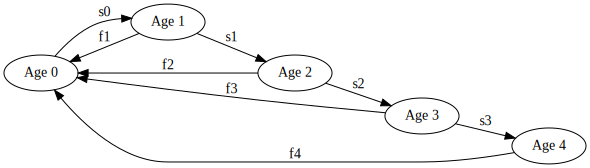

In [1]:
from graphviz import Digraph
pop = Digraph("pop")
pop.attr(rankdir='LR')

p = list(range(5))
with pop.subgraph() as c:
#    c.attr(rank='same')
    for i in p:
        c.node(f"Age {i}")

for i in p:
    if i+1 in p:
        pop.edge(f"Age {i}",f"Age {i+1}",f"s{i}")
    if i != 0:
        pop.edge(f"Age {i}","Age 0",f"f{i}")
    
pop

We suppose that $s_7 = 0$, so that the life-span of the organism in question is $\le 8$ time units.

If the population at time $t$ is described by $\mathbf{p}^{(t)} = \begin{bmatrix} p_0 & p_1 & \cdots & p_7 \end{bmatrix}^T$ then the population at time $t+1$ is given by
$$\mathbf{p}^{(t+1)} = \begin{bmatrix} \sum_{i=0}^7 f_i p_i & s_0p_0 & \cdots & s_6 p_6 \end{bmatrix}^T
= A\mathbf{p}^{(t)}$$
where $$A = \begin{bmatrix}
f_0 & f_1 & f_2 & \cdots & f_6 & f_7 \\
s_0 & 0 & 0  & \cdots & 0 & 0 \\
0 & s_1 & 0  & \cdots & 0 & 0  \\
0 & 0 & s_2  & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \cdots  & s_6 & 0  
\end{bmatrix}.$$

parameters
----------

Previously, we considered this model for two different sets of parameters:


```
fA = [.30,.50,.35,.25,.25,.15,.15,.5]
sA = [.30,.60,.55,.50,.30,.15,.05,0]
```

and


```
fB = [.50,.70,.55,.35,.35,.15,.15,.5]
sB = [.40,.70,.55,.50,.35,.15,.05,0]
```

In [8]:
import numpy as np


float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

def sbv(index,size):
    return np.array([1.0 if i == index else 0.0 for i in range(size)])

## note
## bv("b",["a","b","c"])
## >> np.array([0,1,0])

ones = np.ones(8)


def onePowers(f,s,iter=20,skip=1):
    # create the "all ones vector" of the appropriate length
    ones = np.ones(len(f))
    
    # create the matrix `A` -- initial row is the vector `f`; subsequent rows are multiples of
    # standard basis vectors
    
    A = np.concatenate([ [f], [ s[i]*sbv(i,len(f)) for i in range(len(sA))] ], axis = 0)

    # computes the product of `ones` and the jth power of the matrix `A`
    # returns the results as a `dictionary` with key `j` and value
    # `ones @ A^j`
    
    s ={ j : ones @ np.linalg.matrix_power(A,j)
         for j in range(0,iter,skip) }
    
    return s


def A(f=[],s=[]):
    return np.concatenate([ [f], [ s[i]*sbv(i,len(f)) for i in range(len(s))] ], axis = 0)


def abs_eig_vals(f,s):
    e_val,_ = npl.eig(A(f,s))
    return [ float(np.abs(x)) for x in e_val ]


In [9]:
fA = [.30,.50,.35,.25,.25,.15,.15,.5]
sA = [.30,.60,.55,.50,.30,.15,.05]
pprint.pp(abs_eig_vals(fA,sA))

In [10]:
fB = [.50,.70,.55,.35,.35,.15,.15,.5]
sB = [.40,.70,.55,.50,.35,.15,.05]
pprint.pp(abs_eig_vals(fB,sB))

[1.0104953810383637,
 0.36497808499800904,
 0.36497808499800904,
 0.3748508468483046,
 0.3748508468483046,
 0.1787639416420966,
 0.17288710686695213,
 0.17288710686695213]


In [11]:
(len(fB),len(sB))

(8, 7)

Let's look at one more example, now where the organisms have a max life-span of 4 time units (for simplicity!)

Let's consider

```
fC = [0, .2, .49559, 0.4]
sC = [.98, .96, .9]
```

In [12]:
fC = [0.000, .2, .49559, 0.399]
sC = [.9799, .96, .9]

pprint.pp(abs_eig_vals(fC,sC))

e_vals,e_vecs = npl.eig(A(fC,sC))

pprint.pp(e_vals)
pprint.pp(e_vecs)


[0.9999969131763253, 0.7508930550032085, 0.7508930550032085, 0.5991196464539855]
array([ 0.99999691+0.j        , -0.20043863+0.72364683j,
       -0.20043863-0.72364683j, -0.59911965+0.j        ])
array([[ 0.5298541 +0.j        ,  0.23531368-0.22372896j,
         0.23531368+0.22372896j,  0.19595556+0.j        ],
       [ 0.51920563+0.j        , -0.3633377 -0.2180027j ,
        -0.3633377 +0.2180027j , -0.32049834+0.j        ],
       [ 0.49843895+0.j        , -0.14460272+0.52206151j,
        -0.14460272-0.52206151j,  0.51355085+0.j        ],
       [ 0.44859644+0.j        ,  0.64928822+0.j        ,
         0.64928822-0.j        , -0.7714582 +0.j        ]])
np.complex128(0.9999969131763253+0j)


In [15]:
# note that the 0-th eigenvalue is essentially 1
pprint.pp(e_vals[0])

# and the corresponding eigenvector is
pprint.pp(e_vecs[:,0])


np.complex128(0.9999969131763253+0j)
array([0.5298541 +0.j, 0.51920563+0.j, 0.49843895+0.j, 0.44859644+0.j])


**Remark**: Observe that these results purport to be complex numbers -- but they have 0 imaginary part
e.g. the `0-th` eigenvalue is `0.9999969131763253+0j` which is roughly the real number 1.

However `e_vals[1]` is genuinely a complex number: `-0.20043863336116968+0.723646829819877j`
or about `-.2 + .72j`

In [16]:
e_vals[1]

np.complex128(-0.20043863336116968+0.723646829819877j)

Explainer
---------

In each case, the matrix $A$ has distinct eigenvalues (in case ``C`` there are two eigenvalues
with the same absolute value, but they are complex and distinct from one another!) Thus $A$ is diagonalizable in each case.

For the parameters ``fA,sA`` all eigenvalues of $A$ have absolute value $< 1$. This confirms our previous conclusion that 

$$A^m \to \mathbf{0} \quad \text{as $m \to \infty$}$$

For the parameters ``fB,sB`` there is an eigenvalue of $A$ which has abolute value $1.01 >1$ (actually, this $1.01$ *is* the eigenvalue).
Thus
$A^m$ has no limiting value as $m \to \infty$.

Finally, the parameters ``fC,sC`` yield an eigenvalue of $A$ which is very close to 1.



``fC,sC``
---------

In this setting, note that the corresponding 1-eigenvector is
```
w=[0.5298541, 0.51920563, 0.49843895, 0.44859644]
```

Let's normalize the vector ``w`` by dividing by the sum of its components

(recall that any non-zero multiple of a $\lambda$-eigenvector is again a $\lambda$-eigenvector!)

In [13]:
w=np.array([0.5298541, 0.51920563, 0.49843895, 0.44859644])
ww = (1/np.sum(w))*w
ww

array([0.27, 0.26, 0.25, 0.22])

Thus the components of ``ww`` sum to 1. They represent *probabilities*.

We conclude that the expected longterm population distribution in this case is:

| Age 0 | Age 1 | Age 2 | Age 3 |
| -----:|------:|------:|------:|
| 27 %  | 26 %  |  25 % |  22 % |